<a href="https://colab.research.google.com/github/Viggofudail/Project-A-Kelompok-3-PBA-GASAL-2025-2026/blob/main/PBA_MitraDarat_Project%20B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [ ]:
!pip install -q \
    pandas \
    numpy \
    matplotlib \
    seaborn \
    scikit-learn \
    imbalanced-learn \
    Sastrawi \
    transformers \
    datasets \
    evaluate \
    tqdm \
    newspaper3k \
    beautifulsoup4 \
    trafilatura

**Import Library & Global Configuration**

In [ ]:
# Library dasar
import random
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Handling imbalance
from imblearn.over_sampling import RandomOverSampler

# NLP Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Progress bar
from tqdm import tqdm

# BERT
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)

# Set random seed agar hasil konsisten
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Pengaturan tampilan
pd.set_option('display.max_colwidth', 300)
sns.set(style="whitegrid")

**GPU & Environment Check**

In [ ]:
print("Apakah GPU tersedia?", torch.cuda.is_available())

if torch.cuda.is_available():
    print("Nama GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU tidak terdeteksi. BERT akan berjalan di CPU (lebih lambat).")


Apakah GPU tersedia? False
GPU tidak terdeteksi. BERT akan berjalan di CPU (lebih lambat).


# Dataset Load

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Viggofudail/Project-A-Kelompok-3-PBA-GASAL-2025-2026/84a10c5dbf231bdf78f8ef0ea63df5ab5c7f3d62/Kelompok%203%20-%20Link%20Berita%20MitraDarat.xlsx"

# Baca Excel dari GitHub
df = pd.read_excel(url)

# Tampilkan 5 baris pertama
df.head()


,No,PIC,URL,URL [Direct],Published,Source,Label
0,1,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxPNThONlRPOHRneEIwTE5CWUtwS3NsSzM1STdVUXR5OHJGR1VjQUJidGFyY3Q2dTFqQ2tNQW5wRUt0OHhtbHJlVFZnSDVtVWdKWlF4VXBTdFd5bW9UWUJDSkR6MGcyTFB3cml6alUwbF82TFhvZjZSb0trc0lEblF5UmFfalBGY0dHQmctQlU3eWw0cGFYSS0wNGNjcUN5YnY1NXJ6dXBoS09zanI0NG9YNVc4SGNMWTDSAb8BQVV...,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,"Tue, 18 Mar 2025 07:00:00 GMT",Kumparan,Neutral
1,2,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMigwFBVV95cUxPTWIteVI5elBCUjRzU2g4OXNpQzB1anZBalZiUnJ3X25Mc2t4MVRRN1VUM0RNYkgtbzQwdjJGQnlxUWE1LWFobHpWNWk3WUpmMGYxZnhzekR6cllIVms2dmVBdHc3a0NLdkg4TENoNE1rTGFfSWFMSDk1Z3EyU2t6UTFUSQ?oc=5,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,"Fri, 07 Mar 2025 03:42:41 GMT",UMSU,Neutral
2,3,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMidkFVX3lxTFA2U3VSb1RzbkxsT3BTS1p4X1JBQ2tQLUZfb2NNWXV3N1RqV2dNaFRpbXpCZmRsUjRKUlZBVHI2Zms3VUVkU3NOUWlMYXk1cVpXTWxJTEZ6MHZuTFRMU1NuMUpndFNZeTlWc0twSDJfLTBacXROc3c?oc=5,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,"Thu, 13 Feb 2025 08:00:00 GMT",Sahabat Pegadaian,Neutral
3,4,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxNRlpBRDBEZFNqZlBPLWFmZTdPZ1dQNVhYeFdmQnpSN21QeGx3NEVDNlp2RW1oUHlVY3RSWHJXTmxoeWNud1RWZ2Z3ZmhubHlCMGFTalczVDQ2Rk1PTFZwMGFuRE5Cbkx6QmFVbnMyTFU3MklocDhabmZFc2lpTVdRQXVhOWNYTkVNSWt5UTg5R2ZITnhjUmFvczdNcXByU2NtNnJmTTJrMTJoZU1PbXNxNlhsVTJJN3c?oc=5,https://www.acehprov.go.id/berita/kategori/umum/pemanfaatan-aplikasi-mitra-darat-membuat-mudah-naik-trans-koetaradja,"Tue, 29 Oct 2024 07:00:00 GMT",Pemerintahan Aceh,Positive
4,5,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMiqAFBVV95cUxOdG1wWnZnX0NrXy1uZXhrTHMxVjMxMlVIc0hxd1RIdFA0QzNTY3hGdFh4NmpOTVQyc0JMQUhydm5PcDVLVVh2M2NTdzhTVnJFUVZGVHNDQWx5dC1KSm9qS09McTBwRU9Qc2JEeUZVcl9rdXZSelRNb1lhU1B6UXJBMU82cTBLbExOaTg3Mm9KVzYwQmUwN1BaYmtxS1RnQm9hWHhmdG5Yblo?oc=5,https://rri.co.id/index.php/info-kementerian/1377170/ingin-mudik-gratis-berikut-kota-tujuan-dan-jadwalnya,"Sat, 08 Mar 2025 08:00:00 GMT",RRI.co.id,Neutral


**Dataset Validation**

In [ ]:
# Pastikan dataset sudah dimuat
try:
    df
except NameError:
    raise Exception("Dataset belum dimuat.")

# Tampilkan info umum
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
print("\nNama kolom:")
print(df.columns.tolist())

# Preview data
display(df.head(5))

Jumlah baris: 174
Jumlah kolom: 7

Nama kolom:
['No', 'PIC', 'URL', 'URL [Direct]', 'Published', 'Source', 'Label']


,No,PIC,URL,URL [Direct],Published,Source,Label
0,1,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxPNThONlRPOHRneEIwTE5CWUtwS3NsSzM1STdVUXR5OHJGR1VjQUJidGFyY3Q2dTFqQ2tNQW5wRUt0OHhtbHJlVFZnSDVtVWdKWlF4VXBTdFd5bW9UWUJDSkR6MGcyTFB3cml6alUwbF82TFhvZjZSb0trc0lEblF5UmFfalBGY0dHQmctQlU3eWw0cGFYSS0wNGNjcUN5YnY1NXJ6dXBoS09zanI0NG9YNVc4SGNMWTDSAb8BQVV...,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,"Tue, 18 Mar 2025 07:00:00 GMT",Kumparan,Neutral
1,2,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMigwFBVV95cUxPTWIteVI5elBCUjRzU2g4OXNpQzB1anZBalZiUnJ3X25Mc2t4MVRRN1VUM0RNYkgtbzQwdjJGQnlxUWE1LWFobHpWNWk3WUpmMGYxZnhzekR6cllIVms2dmVBdHc3a0NLdkg4TENoNE1rTGFfSWFMSDk1Z3EyU2t6UTFUSQ?oc=5,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,"Fri, 07 Mar 2025 03:42:41 GMT",UMSU,Neutral
2,3,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMidkFVX3lxTFA2U3VSb1RzbkxsT3BTS1p4X1JBQ2tQLUZfb2NNWXV3N1RqV2dNaFRpbXpCZmRsUjRKUlZBVHI2Zms3VUVkU3NOUWlMYXk1cVpXTWxJTEZ6MHZuTFRMU1NuMUpndFNZeTlWc0twSDJfLTBacXROc3c?oc=5,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,"Thu, 13 Feb 2025 08:00:00 GMT",Sahabat Pegadaian,Neutral
3,4,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxNRlpBRDBEZFNqZlBPLWFmZTdPZ1dQNVhYeFdmQnpSN21QeGx3NEVDNlp2RW1oUHlVY3RSWHJXTmxoeWNud1RWZ2Z3ZmhubHlCMGFTalczVDQ2Rk1PTFZwMGFuRE5Cbkx6QmFVbnMyTFU3MklocDhabmZFc2lpTVdRQXVhOWNYTkVNSWt5UTg5R2ZITnhjUmFvczdNcXByU2NtNnJmTTJrMTJoZU1PbXNxNlhsVTJJN3c?oc=5,https://www.acehprov.go.id/berita/kategori/umum/pemanfaatan-aplikasi-mitra-darat-membuat-mudah-naik-trans-koetaradja,"Tue, 29 Oct 2024 07:00:00 GMT",Pemerintahan Aceh,Positive
4,5,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMiqAFBVV95cUxOdG1wWnZnX0NrXy1uZXhrTHMxVjMxMlVIc0hxd1RIdFA0QzNTY3hGdFh4NmpOTVQyc0JMQUhydm5PcDVLVVh2M2NTdzhTVnJFUVZGVHNDQWx5dC1KSm9qS09McTBwRU9Qc2JEeUZVcl9rdXZSelRNb1lhU1B6UXJBMU82cTBLbExOaTg3Mm9KVzYwQmUwN1BaYmtxS1RnQm9hWHhmdG5Yblo?oc=5,https://rri.co.id/index.php/info-kementerian/1377170/ingin-mudik-gratis-berikut-kota-tujuan-dan-jadwalnya,"Sat, 08 Mar 2025 08:00:00 GMT",RRI.co.id,Neutral


**Table and Distribution Normalization**

📊 Distribusi Label (FINAL):


,Label,Jumlah Artikel
0,NEU,160
1,POS,10
2,NEG,4


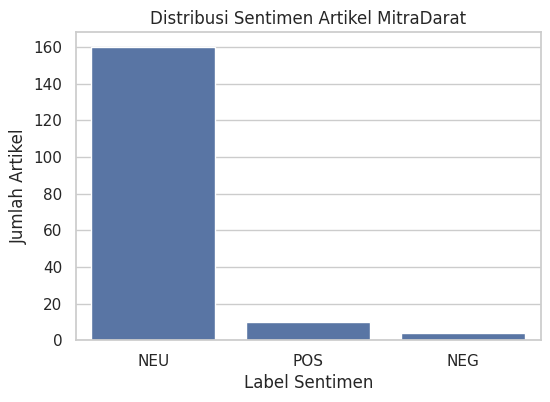

In [ ]:
# Pastikan kolom Label ada
if 'Label' not in df.columns:
    raise Exception("Kolom 'Label' tidak ditemukan di dataset.")

# Normalisasi label
df['Label'] = (
    df['Label']
    .astype(str)
    .str.upper()
    .str.strip()
    .replace({
        'POSITIVE': 'POS',
        'NEGATIVE': 'NEG',
        'NEUTRAL': 'NEU'
    })
)

# Hitung distribusi
label_counts = df['Label'].value_counts()

print("📊 Distribusi Label (FINAL):")

# Buat tabel rapi untuk laporan
label_table = label_counts.rename_axis("Label").reset_index(name="Jumlah Artikel")
display(label_table)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(
    x=label_table['Label'],
    y=label_table['Jumlah Artikel']
)
plt.title("Distribusi Sentimen Artikel MitraDarat")
plt.ylabel("Jumlah Artikel")
plt.xlabel("Label Sentimen")
plt.show()

# Data Scraping

**Scraping Articles from URLs (content extraction)**

In [ ]:
# Imports & HTTP session with retry

import time
import random
import requests
from requests.adapters import HTTPAdapter, Retry
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from newspaper import Article
from tqdm import tqdm
import pandas as pd

# Setup session dengan retry
# Membuat session requests yang menerapkan retry otomatis
session = requests.Session()
retries = Retry(
    total=3,                # total percobaan ulang
    backoff_factor=1.0,     # jeda: 1s, 2s, 4s ...
    status_forcelist=[429,500,502,503,504]
)
adapter = HTTPAdapter(max_retries=retries)
session.mount("http://", adapter)
session.mount("https://", adapter)

# Header
DEFAULT_HEADERS = {
    "User-Agent": "Mozilla/5.0 (compatible; MitraDaratScraper/1.0; +https://example.invalid/)",
    "Accept-Language": "id-ID,id;q=0.9,en-US;q=0.8,en;q=0.7"
}

# Pastikan dataset (df) sudah diload
try:
    df
    display(df.head(5))
    print("Dataset sudah dimuat.")
except NameError:
    raise Exception("Dataset belum dimuat.")

,No,PIC,URL,URL [Direct],Published,Source,Label
0,1,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxPNThONlRPOHRneEIwTE5CWUtwS3NsSzM1STdVUXR5OHJGR1VjQUJidGFyY3Q2dTFqQ2tNQW5wRUt0OHhtbHJlVFZnSDVtVWdKWlF4VXBTdFd5bW9UWUJDSkR6MGcyTFB3cml6alUwbF82TFhvZjZSb0trc0lEblF5UmFfalBGY0dHQmctQlU3eWw0cGFYSS0wNGNjcUN5YnY1NXJ6dXBoS09zanI0NG9YNVc4SGNMWTDSAb8BQVV...,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,"Tue, 18 Mar 2025 07:00:00 GMT",Kumparan,NEU
1,2,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMigwFBVV95cUxPTWIteVI5elBCUjRzU2g4OXNpQzB1anZBalZiUnJ3X25Mc2t4MVRRN1VUM0RNYkgtbzQwdjJGQnlxUWE1LWFobHpWNWk3WUpmMGYxZnhzekR6cllIVms2dmVBdHc3a0NLdkg4TENoNE1rTGFfSWFMSDk1Z3EyU2t6UTFUSQ?oc=5,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,"Fri, 07 Mar 2025 03:42:41 GMT",UMSU,NEU
2,3,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMidkFVX3lxTFA2U3VSb1RzbkxsT3BTS1p4X1JBQ2tQLUZfb2NNWXV3N1RqV2dNaFRpbXpCZmRsUjRKUlZBVHI2Zms3VUVkU3NOUWlMYXk1cVpXTWxJTEZ6MHZuTFRMU1NuMUpndFNZeTlWc0twSDJfLTBacXROc3c?oc=5,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,"Thu, 13 Feb 2025 08:00:00 GMT",Sahabat Pegadaian,NEU
3,4,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMitwFBVV95cUxNRlpBRDBEZFNqZlBPLWFmZTdPZ1dQNVhYeFdmQnpSN21QeGx3NEVDNlp2RW1oUHlVY3RSWHJXTmxoeWNud1RWZ2Z3ZmhubHlCMGFTalczVDQ2Rk1PTFZwMGFuRE5Cbkx6QmFVbnMyTFU3MklocDhabmZFc2lpTVdRQXVhOWNYTkVNSWt5UTg5R2ZITnhjUmFvczdNcXByU2NtNnJmTTJrMTJoZU1PbXNxNlhsVTJJN3c?oc=5,https://www.acehprov.go.id/berita/kategori/umum/pemanfaatan-aplikasi-mitra-darat-membuat-mudah-naik-trans-koetaradja,"Tue, 29 Oct 2024 07:00:00 GMT",Pemerintahan Aceh,POS
4,5,Muhammad Viggo Fudail,https://news.google.com/rss/articles/CBMiqAFBVV95cUxOdG1wWnZnX0NrXy1uZXhrTHMxVjMxMlVIc0hxd1RIdFA0QzNTY3hGdFh4NmpOTVQyc0JMQUhydm5PcDVLVVh2M2NTdzhTVnJFUVZGVHNDQWx5dC1KSm9qS09McTBwRU9Qc2JEeUZVcl9rdXZSelRNb1lhU1B6UXJBMU82cTBLbExOaTg3Mm9KVzYwQmUwN1BaYmtxS1RnQm9hWHhmdG5Yblo?oc=5,https://rri.co.id/index.php/info-kementerian/1377170/ingin-mudik-gratis-berikut-kota-tujuan-dan-jadwalnya,"Sat, 08 Mar 2025 08:00:00 GMT",RRI.co.id,NEU


Dataset sudah dimuat.


**Robust scrape_article(url) Function**

In [ ]:
# Fungsi ini mencoba tiga metode:
# 1) newspaper3k.parse()
# 2) requests + BeautifulSoup (article tag first, else p tags)
# 3) (optional) return error code / message

def scrape_article(url, timeout=12):
    """
    Input: url (string)
    Output: (title (str or None), text (str or None), error_msg (None or str))
    """
    if not url or not isinstance(url, str):
        return None, None, "invalid_url"

    # 1) Try newspaper3k first (fast & extracts main text often)
    try:
        art = Article(url, language="id")
        art.download()
        art.parse()
        title = art.title if art.title else None
        text = art.text if art.text else None
        # Jika newspaper berhasil mengekstrak teks yang cukup panjang, langsung return
        if text and len(text.strip()) > 30:
            return title, text.strip(), None
    except Exception as e:
        # Tidak fatal; lanjut ke fallback
        pass

    # 2) Fallback: requests + BeautifulSoup
    try:
        resp = session.get(url, headers=DEFAULT_HEADERS, timeout=timeout)
        if resp.status_code != 200:
            return None, None, f"http_status_{resp.status_code}"
        soup = BeautifulSoup(resp.text, "html.parser")

        # Title fallback
        title = soup.title.get_text(strip=True) if soup.title else None

        # Prioritaskan tag <article> jika ada
        article_tag = soup.find('article')
        text = None
        if article_tag:
            paras = article_tag.find_all('p')
            text = " ".join([p.get_text(strip=True) for p in paras])
        # Jika tidak ada <article> atau text kosong, fallback ambil semua <p>
        if not text or len(text.strip()) < 30:
            paras = soup.find_all('p')
            text = " ".join([p.get_text(strip=True) for p in paras])
        # Bersihkan whitespace
        if text:
            text = " ".join(text.split())
            if len(text) > 30:
                return title, text, None
            else:
                return title, None, "text_too_short"
        else:
            return title, None, "no_text_found"
    except requests.exceptions.RequestException as re:
        return None, None, f"request_exception_{str(re)}"
    except Exception as e:
        return None, None, f"other_exception_{str(e)}"

**Loop through URLs**

In [ ]:
# Mengambil URL dari kolom 'URL [Direct]'
# Menyusun DataFrame hasil scraping
# title, content_raw, source, scrape_error

from urllib.parse import urlparse

# Pastikan kolom URL [Direct] ada
if 'URL [Direct]' not in df.columns:
    raise Exception("Kolom 'URL [Direct]' tidak ditemukan. Pastikan nama kolom sesuai dataset.")

urls = df['URL [Direct]'].astype(str).tolist()

results = []
print(f"Starting scraping for {len(urls)} URLs using column 'URL [Direct]'")

for u in tqdm(urls, desc="Scraping URLs"):
    title, content, err = scrape_article(u)

    # Ambil domain sebagai source
    try:
        domain = urlparse(u).netloc
    except:
        domain = None

    results.append({
        'URL [Direct]': u,
        'title': title,
        'source': domain,
        'content_raw': content,
        'scrape_error': err
    })

    # Politeness delay (penting untuk etika scraping)
    time.sleep(0.8 + random.random() * 0.8)

# Gabungkan dengan dataset awal
scraped_df = pd.DataFrame(results)
merged = df.merge(scraped_df, on='URL [Direct]', how='left')

print("Scraping selesai")
print("Total artikel:", len(merged))
print("Berhasil ekstrak teks:", merged['content_raw'].notna().sum())
print("Gagal / kosong:", merged['content_raw'].isna().sum())

display(
    merged[['PIC', 'URL [Direct]', 'title', 'source', 'content_raw', 'scrape_error']].head(10)
)

Starting scraping for 174 URLs using column 'URL [Direct]'


Scraping URLs: 100%|██████████| 174/174 [08:07<00:00,  2.80s/it]

Scraping selesai
Total artikel: 204
Berhasil ekstrak teks: 114
Gagal / kosong: 90


,PIC,URL [Direct],title,source,content_raw,scrape_error
0,Muhammad Viggo Fudail,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,Cara Daftar Mudik Gratis Kemenhub 2025 melalui Aplikasi Mitra Darat | kumparan.com,kumparan.com,None,no_text_found
1,Muhammad Viggo Fudail,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,Cara Daftar Mudik Gratis Kemenhub 2025 melalui Aplikasi Mitra Darat | kumparan.com,kumparan.com,None,no_text_found
2,Muhammad Viggo Fudail,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,Cara Mendaftar Mudik Gratis dari Kemenhub 2025,fahum.umsu.ac.id,"Cara Mendaftar Mudik Gratis dari Kemenhub 2025\n\nKementerian Perhubungan (Kemenhub) kembali menyelenggarakan program mudik gratis pada tahun 2025, yang bertujuan memberikan kemudahan bagi masyarakat yang ingin pulang kampung untuk merayakan Idul Fitri tanpa perlu mengeluarkan biaya transportasi...",None
3,Muhammad Viggo Fudail,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,None,sahabat.pegadaian.co.id,None,http_status_403
4,Muhammad Viggo Fudail,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,None,sahabat.pegadaian.co.id,None,http_status_403
5,Muhammad Viggo Fudail,https://www.acehprov.go.id/berita/kategori/umum/pemanfaatan-aplikasi-mitra-darat-membuat-mudah-naik-trans-koetaradja,Pemanfaatan Aplikasi Mitra Darat Membuat Mudah Naik Trans Koetaradja,www.acehprov.go.id,None,text_too_short
6,Muhammad Viggo Fudail,https://rri.co.id/index.php/info-kementerian/1377170/ingin-mudik-gratis-berikut-kota-tujuan-dan-jadwalnya,None,rri.co.id,None,http_status_403
7,Muhammad Viggo Fudail,https://bali.antaranews.com/berita/375701/pengguna-bisa-cek-pergerakan-trans-metro-dewata-lewat-aplikasi,Pengguna bisa cek pergerakan Trans Metro Dewata lewat aplikasi,bali.antaranews.com,Denpasar (ANTARA) - Dinas Perhubungan (Dishub) Bali mengarahkan pengguna layanan transportasi publik Trans Metro Dewata mengecek pergerakan bus melalui aplikasi di telepon canggih masing-masing.\n\nHal ini disampaikan Kepala Bidang Angkutan Jalan Dishub Bali Nyoman Sunarya merespons banyaknya pe...,None
8,Muhammad Viggo Fudail,https://disway.id/read/856493/syarat-dan-cara-daftar-mudik-gratis-2025-kemenhub-lewat-aplikasi-mitra-darat,Syarat dan Cara Daftar Mudik Gratis 2025 Kemenhub Lewat Aplikasi Mitra Darat,disway.id,"Syarat dan Cara Daftar Mudik Gratis 2025 Kemenhub Lewat Aplikasi Mitra Darat\n\nReporter: Syifa Lulu | Editor: Syifa Lulu\n\nIlustrasi mudik gratis Nataru Kemenhub--Kemenhub\n\nJAKARTA, DISWAY.ID -- Kementerian Perhubungan (Kemenhub) akan segera menggelar program mudik gratis 2025 untuk para per...",None
9,Muhammad Viggo Fudail,https://ppid.tangerangkota.go.id/artikel/detail/50269/dishub-kota-tangerang-buka-posko-validasi-peserta-mudik-gratis-kemenhub-2025,PPID Kota Tangerang,ppid.tangerangkota.go.id,"Gedung Pusat Pemerintahan Kota Tangerang,Lantai 3 Jl. Satria Sudirman No. 1 Kota Tangerang 15123 Telp : (021) 55764957Email : ppid@tangerangkota.go.id",None


**Quality checks**

In [ ]:
merged['word_count'] = (
    merged['content_raw']
    .fillna('')
    .str.split()
    .apply(lambda x: len(x) if isinstance(x, list) else 0)
)

print("Ringkasan panjang artikel (word_count):")
display(merged['word_count'].describe())

failed_mask = merged['content_raw'].isna() | (merged['word_count'] < 30)
print(f"Jumlah artikel gagal / sangat pendek: {failed_mask.sum()}")

display(
    merged.loc[failed_mask, ['URL [Direct]', 'scrape_error']]
    .head(20)
)

Ringkasan panjang artikel (word_count):


,word_count
count,204.000000
mean,223.235294
std,252.367965
min,0.000000
25%,0.000000
50%,216.000000
75%,388.000000
max,1215.000000


Jumlah artikel gagal / sangat pendek: 91


,URL [Direct],scrape_error
0,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,no_text_found
1,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,no_text_found
3,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,http_status_403
4,https://sahabat.pegadaian.co.id/artikel/inspirasi/mudik-gratis-2025,http_status_403
5,https://www.acehprov.go.id/berita/kategori/umum/pemanfaatan-aplikasi-mitra-darat-membuat-mudah-naik-trans-koetaradja,text_too_short
6,https://rri.co.id/index.php/info-kementerian/1377170/ingin-mudik-gratis-berikut-kota-tujuan-dan-jadwalnya,http_status_403
9,https://ppid.tangerangkota.go.id/artikel/detail/50269/dishub-kota-tangerang-buka-posko-validasi-peserta-mudik-gratis-kemenhub-2025,None
10,https://malangraya.pikiran-rakyat.com/nasional/pr-3629137657/mudik-gratis-jalur-darat-kemehub-tahun-2025-dibuka-simak-jadwal-dan-rute-yang-disediakan,http_status_403
11,https://malangraya.pikiran-rakyat.com/nasional/pr-3629137657/mudik-gratis-jalur-darat-kemehub-tahun-2025-dibuka-simak-jadwal-dan-rute-yang-disediakan,http_status_403
13,https://www.tribunnews.com/nasional/2025/03/10/cara-daftar-mudik-gratis-kemenhub-2025-mitra-darat-online-di-nusantarakemenhubgoid-cek-tujuannya,http_status_403


# Data Preprocessing

**Validate content_raw & Set Main Text Column**

In [ ]:
# Pastikan dataframe hasil scraping bernama `merged`
try:
    merged
except NameError:
    raise Exception("Data hasil scraping (`merged`) belum tersedia.")

# Pastikan kolom content_raw ada
if 'content_raw' not in merged.columns:
    raise Exception("Kolom 'content_raw' tidak ditemukan. Scraping belum berhasil.")

# Cek jumlah artikel tanpa konten
num_empty = merged['content_raw'].isna().sum()
print(f"Jumlah artikel TANPA content_raw: {num_empty} dari {len(merged)}")

if num_empty > 0:
    print("PERINGATAN: Beberapa artikel tidak memiliki isi teks.")
    print("Artikel ini akan tetap dipertahankan, namun perlu diperhatikan saat analisis.")

# Set kolom teks utama
merged['text_raw'] = merged['content_raw'].astype(str)

# Preview
display(
    merged[['URL [Direct]', 'title', 'text_raw']]
    .head(3)
)

Jumlah artikel TANPA content_raw: 90 dari 204
PERINGATAN: Beberapa artikel tidak memiliki isi teks.
Artikel ini akan tetap dipertahankan, namun perlu diperhatikan saat analisis.


,URL [Direct],title,text_raw
0,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,Cara Daftar Mudik Gratis Kemenhub 2025 melalui Aplikasi Mitra Darat | kumparan.com,None
1,https://kumparan.com/berita-hari-ini/cara-daftar-mudik-gratis-kemenhub-2025-melalui-aplikasi-mitra-darat-24hduKfy868,Cara Daftar Mudik Gratis Kemenhub 2025 melalui Aplikasi Mitra Darat | kumparan.com,None
2,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,Cara Mendaftar Mudik Gratis dari Kemenhub 2025,"Cara Mendaftar Mudik Gratis dari Kemenhub 2025\n\nKementerian Perhubungan (Kemenhub) kembali menyelenggarakan program mudik gratis pada tahun 2025, yang bertujuan memberikan kemudahan bagi masyarakat yang ingin pulang kampung untuk merayakan Idul Fitri tanpa perlu mengeluarkan biaya transportasi..."


**Aggressive Preprocessing Functions for TF-IDF**

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Sastrawi (Bahasa Indonesia)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text_tfidf(text):
    """
    Preprocessing teks untuk TF-IDF:
    - Lowercasing
    - Hapus URL
    - Hapus angka & tanda baca
    - Normalisasi spasi
    - Stemming Bahasa Indonesia (Sastrawi)
    """
    if not text or text == "nan":
        return ""

    # Lowercase
    text = str(text).lower()
    # Hapus URL (http, https)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    # Ganti tanda baca & karakter non-alfabet dengan spasi
    text = re.sub(r'[^a-z\u00C0-\u017F\s]', ' ', text)
    # Normalisasi spasi
    text = re.sub(r'\s+', ' ', text).strip()

    # Stemming (Sastrawi) — menggunakan try/except untuk keamanan
    try:
        text = stemmer.stem(text)
    except:
        # Jika stemming gagal, kembalikan teks yang sudah dibersihkan
        print("Stemming gagal:", e)
        pass
    return text

**Apply TF-IDF Preprocessing**

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="TF-IDF preprocessing")

merged['text_tfidf'] = merged['text_raw'].progress_apply(clean_text_tfidf)

# Hitung word count setelah preprocessing
merged['wc_tfidf'] = merged['text_tfidf'].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

print("Statistik word count setelah preprocessing TF-IDF:")
display(merged['wc_tfidf'].describe())

# Tampilkan contoh hasil
print("Contoh hasil preprocessing TF-IDF:")
display(
    merged[['text_raw', 'text_tfidf']]
    .head(10)
)

# Warning jika teks terlalu pendek
short_docs = (merged['wc_tfidf'] < 5).sum()
if short_docs > 0:
    print(f"{short_docs} artikel memiliki < 5 kata setelah preprocessing TF-IDF.")

TF-IDF preprocessing: 100%|██████████| 204/204 [01:10<00:00,  2.91it/s]

Statistik word count setelah preprocessing TF-IDF:


,wc_tfidf
count,204.000000
mean,213.715686
std,239.765048
min,1.000000
25%,1.000000
50%,210.500000
75%,354.000000
max,1145.000000


Contoh hasil preprocessing TF-IDF:


,text_raw,text_tfidf
0,None,none
1,None,none
2,"Cara Mendaftar Mudik Gratis dari Kemenhub 2025\n\nKementerian Perhubungan (Kemenhub) kembali menyelenggarakan program mudik gratis pada tahun 2025, yang bertujuan memberikan kemudahan bagi masyarakat yang ingin pulang kampung untuk merayakan Idul Fitri tanpa perlu mengeluarkan biaya transportasi...",cara daftar mudik gratis dari kemenhub menteri hubung kemenhub kembali selenggara program mudik gratis pada tahun yang tuju beri mudah bagi masyarakat yang ingin pulang kampung untuk raya idul fitri tanpa perlu keluar biaya transportasi program ini tawar bagai pilih moda transportasi seperti ker...
3,None,none
4,None,none
5,None,none
6,None,none
7,Denpasar (ANTARA) - Dinas Perhubungan (Dishub) Bali mengarahkan pengguna layanan transportasi publik Trans Metro Dewata mengecek pergerakan bus melalui aplikasi di telepon canggih masing-masing.\n\nHal ini disampaikan Kepala Bidang Angkutan Jalan Dishub Bali Nyoman Sunarya merespons banyaknya pe...,denpasar antara dinas hubung dishub bal arah guna layan transportasi publik trans metro dewata ecek gera bus lalu aplikasi di telepon canggih masing masing hal ini sampai kepala bidang angkut jalan dishub bal nyoman sunarya respons banyak tanya masyarakat soal kurang informasi layan trans metro ...
8,"Syarat dan Cara Daftar Mudik Gratis 2025 Kemenhub Lewat Aplikasi Mitra Darat\n\nReporter: Syifa Lulu | Editor: Syifa Lulu\n\nIlustrasi mudik gratis Nataru Kemenhub--Kemenhub\n\nJAKARTA, DISWAY.ID -- Kementerian Perhubungan (Kemenhub) akan segera menggelar program mudik gratis 2025 untuk para per...",syarat dan cara daftar mudik gratis kemenhub lewat aplikasi mitra darat reporter syifa lulu editor syifa lulu ilustrasi mudik gratis nataru kemenhub kemenhub jakarta disway id menteri hubung kemenhub akan segera gelar program mudik gratis untuk para rantau mudik gratis kemenhub ini jadi program ...
9,"Gedung Pusat Pemerintahan Kota Tangerang,Lantai 3 Jl. Satria Sudirman No. 1 Kota Tangerang 15123 Telp : (021) 55764957Email : ppid@tangerangkota.go.id",gedung pusat perintah kota tangerang lantai jl satria sudirman no kota tangerang telp email ppid tangerangkota go id


90 artikel memiliki < 5 kata setelah preprocessing TF-IDF.


**Minimal preprocessing functions for BERT**

In [ ]:
import html

def clean_text_bert(text):
    """
    Preprocessing minimal untuk BERT:
    - Decode HTML entities
    - Hapus URL
    - Normalisasi whitespace
    - TIDAK melakukan stemming / stopword removal
    """
    if not text or text == "nan":
        return ""

    text = str(text)
    text = html.unescape(text)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

**Implement BERT Preprocessing & Length Analysis**

BERT preprocessing: 100%|██████████| 204/204 [00:00<00:00, 12679.50it/s]

Statistik panjang teks untuk BERT (word count):


,wc_bert
count,204.000000
mean,223.598039
std,251.829689
min,1.000000
25%,1.000000
50%,216.000000
75%,388.000000
max,1215.000000


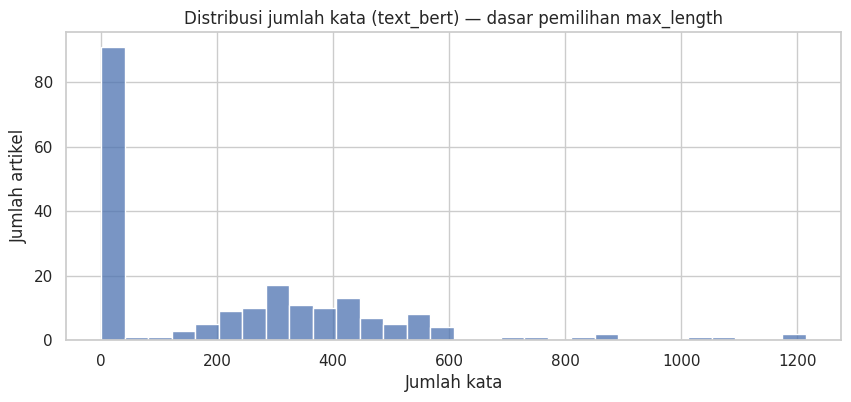

Rekomendasi awal max_length (berdasarkan P90): 527 kata
Contoh artikel sangat panjang (>300 kata):


,URL [Direct],title,wc_bert
2,https://fahum.umsu.ac.id/blog/cara-mendaftar-mudik-gratis-dari-kemenhub-2025/,Cara Mendaftar Mudik Gratis dari Kemenhub 2025,465
7,https://bali.antaranews.com/berita/375701/pengguna-bisa-cek-pergerakan-trans-metro-dewata-lewat-aplikasi,Pengguna bisa cek pergerakan Trans Metro Dewata lewat aplikasi,338
8,https://disway.id/read/856493/syarat-dan-cara-daftar-mudik-gratis-2025-kemenhub-lewat-aplikasi-mitra-darat,Syarat dan Cara Daftar Mudik Gratis 2025 Kemenhub Lewat Aplikasi Mitra Darat,432
12,https://www.kompas.com/tren/read/2025/03/11/180000465/mudik-gratis-bumn-2025-ini-kota-tujuan-dan-asal-dari-mitra-darat,"Mudik Gratis BUMN 2025, Ini Kota Tujuan dan Asal dari Mitra Darat",344
15,https://news.detik.com/berita/d-7815699/syarat-dan-cara-daftar-mudik-gratis-kemenhub-lebaran-2025,Syarat dan Cara Daftar Mudik Gratis Kemenhub Lebaran 2025,480
16,https://news.detik.com/berita/d-7815699/syarat-dan-cara-daftar-mudik-gratis-kemenhub-lebaran-2025,Syarat dan Cara Daftar Mudik Gratis Kemenhub Lebaran 2025,480
18,https://umsu.ac.id/berita/cara-mendaftar-mudik-gratis-2024-dan-rincian-kota-asal-tujuan/,Cara Mendaftar Mudik Gratis 2024 dan Rincian Kota Asal-Tujuan – Berita dan Informasi,352
19,https://www.tangerangkota.go.id/berita/detail/50391/posko-validasi-tiket-mudik-gratis-dishub-kota-tangerang-telah-layani-2-232-calon-pemudik-di-hari-keempat,Posko Validasi Tiket Mudik Gratis Dishub Kota Tangerang Telah Layani 2.232 Calon Pemudik di Hari Keempat,314
28,https://www.antaranews.com/berita/4524925/mudik-gratis-libur-nataru-kemenhub-cek-jadwal-dan-cara-daftarnya,"Mudik gratis libur Nataru Kemenhub, cek jadwal dan cara daftarnya",410
32,https://www.kompas.tv/lifestyle/576901/simak-berikut-cara-daftar-mudik-gratis-2025-dari-kemenhub,"Simak, Berikut Cara Daftar Mudik Gratis 2025 dari Kemenhub",371


In [ ]:
tqdm.pandas(desc="BERT preprocessing")
merged['text_bert'] = merged['text_raw'].progress_apply(clean_text_bert)

# Hitung word & char count
merged['wc_bert'] = merged['text_bert'].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)
merged['char_bert'] = merged['text_bert'].str.len()

print("Statistik panjang teks untuk BERT (word count):")
display(merged['wc_bert'].describe())

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10,4))
sns.histplot(merged['wc_bert'], bins=30)
plt.title("Distribusi jumlah kata (text_bert) — dasar pemilihan max_length")
plt.xlabel("Jumlah kata")
plt.ylabel("Jumlah artikel")
plt.show()

# Rekomendasi max_length
p90 = np.percentile(merged['wc_bert'], 90)
print(f"Rekomendasi awal max_length (berdasarkan P90): {int(p90)} kata")

# Contoh artikel sangat panjang
print("Contoh artikel sangat panjang (>300 kata):")
display(
    merged[merged['wc_bert'] > 300][['URL [Direct]', 'title', 'wc_bert']]
    .head(10)
)

# TF-IDF Vectorizer

**Fit TF-IDF on Full Corpus**

In [ ]:
# Fit TfidfVectorizer pada seluruh korpus yang sudah di-clean untuk TF-IDF
# max_features=5000 sesuai referensi paper; ngram_range bisa 1-2 untuk menangkap bigram kata penting

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Pastikan kolom text_tfidf ada
if 'text_tfidf' not in merged.columns:
    raise Exception("Kolom 'text_tfidf' belum tersedia.")

# Inisialisasi dan fit
vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
Xv_all = vec.fit_transform(merged['text_tfidf'].fillna(''))

print("TF-IDF matrix shape:", Xv_all.shape)
print("Jumlah fitur (vocab):", len(vec.get_feature_names_out()))
# Tampilkan 20 fitur pertama untuk spot-check
print("Contoh fitur (first 20):", vec.get_feature_names_out()[:20])

TF-IDF matrix shape: (204, 5000)
Jumlah fitur (vocab): 5000
Contoh fitur (first 20): ['ac' 'access' 'aceh' 'aceh alir' 'aceh desa' 'achmad' 'achmad suhaely'
 'ada' 'ada baik' 'ada dalam' 'ada di' 'ada fasilitas' 'ada jual'
 'ada juga' 'ada kota' 'ada mudik' 'ada oleh' 'ada program' 'ada saat'
 'ada sehat']


**Prepare Labels and Train/Test Split**

In [ ]:
# Map label text ke integer (NEU=0, POS=1, NEG=2)
# Jika kelas sangat kecil (<2), lakukan split non-stratified
# Tampilkan distribusi di train/test untuk transparansi

from sklearn.model_selection import train_test_split

# Pastikan kolom Label ada
if 'Label' not in merged.columns:
    raise Exception("Kolom 'Label' tidak ditemukan pada merged dataframe.")

# Label mapping konsisten
label2id = {'NEU':0, 'POS':1, 'NEG':2}
id2label = {v:k for k,v in label2id.items()}

merged['label_id'] = merged['Label'].map(label2id)

# Hitung distribusi
label_counts = merged['Label'].value_counts()
print("Distribusi label (full):")
display(label_counts)

# Prepare X (TF-IDF features) and y (labels)
X = Xv_all  # Sparse matrix
y = merged['label_id'].fillna(-1).astype(int).values

# Check smallest class size (support)
from collections import Counter
cnts = Counter(merged['label_id'].values)
print("Class counts (label_id):", cnts)

# If any class < 2, warn & use non-stratified split
min_count = min([v for k,v in cnts.items() if k in [0,1,2]])
if min_count < 2:
    print("Ada kelas dengan kurang dari 2 sampel. Menggunakan non-stratified split.")
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        X, y, merged.index.values, test_size=0.2, random_state=SEED, shuffle=True
    )
else:
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        X, y, merged.index.values, test_size=0.2, random_state=SEED, stratify=merged['label_id']
    )

print("Ukuran train:", X_train.shape[0], " Ukuran test:", X_test.shape[0])
# Print distribusi di train/test
print("Distribusi di train:")
display(pd.Series(y_train).map(id2label).value_counts())
print("Distribusi di test:")
display(pd.Series(y_test).map(id2label).value_counts())

Distribusi label (full):


,count
Label,
NEU,189
POS,11
NEG,4


Class counts (label_id): Counter({np.int64(0): 189, np.int64(1): 11, np.int64(2): 4})
Ukuran train: 163  Ukuran test: 41
Distribusi di train:


,count
NEU,151
POS,9
NEG,3


Distribusi di test:


,count
NEU,38
POS,2
NEG,1


**Baseline SVM (LinearSVC) — No class_weight**

Accuracy (SVM baseline): 0.9512

Classification report (SVM baseline):
              precision    recall  f1-score   support

         NEU       0.95      1.00      0.97        38
         POS       1.00      0.50      0.67         2
         NEG       0.00      0.00      0.00         1

    accuracy                           0.95        41
   macro avg       0.65      0.50      0.55        41
weighted avg       0.93      0.95      0.94        41



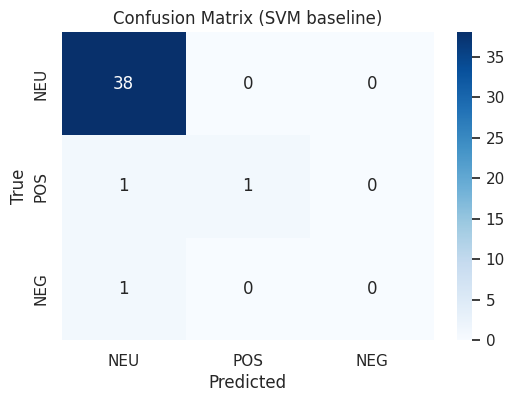

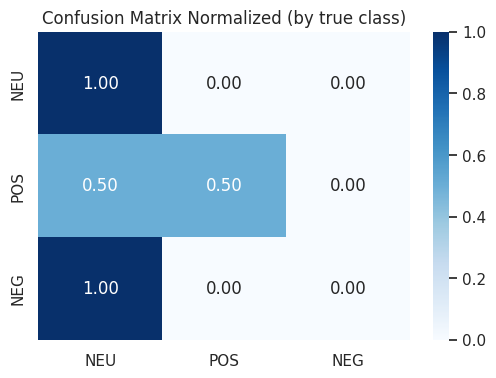

In [ ]:
# LinearSVC cenderung cepat, cocok sebagai baseline
# Tampilkan classification_report yang memuat precision/recall/f1/support

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit model
clf = LinearSVC(random_state=SEED, max_iter=10000)
clf.fit(X_train, y_train)

# Predict on test
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (SVM baseline): {acc:.4f}\n")
print("Classification report (SVM baseline):")
print(classification_report(y_test, y_pred, target_names=[id2label[i] for i in sorted(id2label.keys())], zero_division=0))

# Confusion matrix (absolute)
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[id2label[i] for i in [0,1,2]], yticklabels=[id2label[i] for i in [0,1,2]], cmap='Blues')
plt.ylabel('True'); plt.xlabel('Predicted'); plt.title('Confusion Matrix (SVM baseline)')
plt.show()

# Normalized confusion matrix (row-wise)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(6,4))
sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=[id2label[i] for i in [0,1,2]], yticklabels=[id2label[i] for i in [0,1,2]], cmap='Blues')
plt.title('Confusion Matrix Normalized (by true class)')
plt.show()

**LinearSVC with class_weight='balanced'**

In [ ]:
clf_bal = LinearSVC(class_weight='balanced', random_state=SEED, max_iter=10000)
clf_bal.fit(X_train, y_train)
y_pred_bal = clf_bal.predict(X_test)

acc_bal = accuracy_score(y_test, y_pred_bal)
print(f"Accuracy (SVM balanced): {acc_bal:.4f}\n")
print("Classification report (SVM balanced):")
print(classification_report(y_test, y_pred_bal, target_names=[id2label[i] for i in sorted(id2label.keys())], zero_division=0))

Accuracy (SVM balanced): 0.9512

Classification report (SVM balanced):
              precision    recall  f1-score   support

         NEU       0.95      1.00      0.97        38
         POS       1.00      0.50      0.67         2
         NEG       0.00      0.00      0.00         1

    accuracy                           0.95        41
   macro avg       0.65      0.50      0.55        41
weighted avg       0.93      0.95      0.94        41



**Oversampling (RandomOverSampler) on Train Set**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Convert training sparse matrix to dense array (dataset small; safe)
X_train_array = X_train.toarray()
ros = RandomOverSampler(random_state=SEED)
X_resampled, y_resampled = ros.fit_resample(X_train_array, y_train)

print("Before resample (train) distribution:")
display(pd.Series(y_train).map(id2label).value_counts())
print("After resample (train) distribution:")
display(pd.Series(y_resampled).map(id2label).value_counts())

# Fit LinearSVC on resampled data
clf_ros = LinearSVC(random_state=SEED, max_iter=10000)
clf_ros.fit(X_resampled, y_resampled)

# Predict on original test (transform test to dense for predict)
y_pred_ros = clf_ros.predict(X_test.toarray())

print("Accuracy (SVM + RandomOverSampler):", accuracy_score(y_test, y_pred_ros))
print("Classification report (SVM + ROS):")
print(classification_report(y_test, y_pred_ros, target_names=[id2label[i] for i in sorted(id2label.keys())], zero_division=0))

Before resample (train) distribution:


,count
NEU,151
POS,9
NEG,3


After resample (train) distribution:


,count
NEU,151
POS,151
NEG,151


Accuracy (SVM + RandomOverSampler): 0.4634146341463415
Classification report (SVM + ROS):
              precision    recall  f1-score   support

         NEU       0.95      0.47      0.63        38
         POS       1.00      0.50      0.67         2
         NEG       0.00      0.00      0.00         1

    accuracy                           0.46        41
   macro avg       0.65      0.32      0.43        41
weighted avg       0.93      0.46      0.62        41



**Extract Top TF-IDF Words per Class**

In [ ]:
# Untuk setiap kelas, ambil dokumen sesuai label, lalu hitung mean TF-IDF per fitur.
# Tampilkan Top-10 kata per kelas beserta skor rata-rata.

feature_names = np.array(vec.get_feature_names_out())
topn = 10
rows = []

# Gunakan Xv_all (shape: n_samples x n_features)
for lbl_text, lbl_id in label2id.items():
    # Indeks dokumen yang punya label lbl_text
    idxs = merged.index[merged['label_id'] == lbl_id].tolist()
    if len(idxs) == 0:
        print(f"Class {lbl_text} has no documents, skipping.")
        continue
    Xc = Xv_all[idxs]  # Submatrix
    mean_tfidf = np.asarray(Xc.mean(axis=0)).ravel()
    top_idx = mean_tfidf.argsort()[-topn:][::-1]
    words = feature_names[top_idx]
    scores = mean_tfidf[top_idx]
    rows.extend([{'class': lbl_text, 'word': w, 'avg_tfidf': float(s)} for w,s in zip(words,scores)])

tfidf_top_df = pd.DataFrame(rows)
# Tampilkan rapi per class
for cls in tfidf_top_df['class'].unique():
    print(f"\nTop {topn} TF-IDF words for class {cls}:")
    display(tfidf_top_df[tfidf_top_df['class']==cls].sort_values('avg_tfidf', ascending=False).reset_index(drop=True))


Top 10 TF-IDF words for class NEU:


,class,word,avg_tfidf
0,NEU,none,0.444444
1,NEU,mudik,0.110378
2,NEU,gratis,0.067170
3,NEU,dan,0.066676
4,NEU,mudik gratis,0.064172
5,NEU,daftar,0.060009
6,NEU,yang,0.051021
7,NEU,serta,0.040419
8,NEU,untuk,0.038818
9,NEU,kemenhub,0.036399



Top 10 TF-IDF words for class POS:


,class,word,avg_tfidf
0,POS,none,0.363636
1,POS,dan,0.097848
2,POS,layan,0.089834
3,POS,izin,0.085297
4,POS,digitalisasi,0.082057
5,POS,aplikasi,0.065476
6,POS,darat,0.062254
7,POS,ferizy,0.052439
8,POS,yang,0.051495
9,POS,integrasi,0.051336



Top 10 TF-IDF words for class NEG:


,class,word,avg_tfidf
0,NEG,none,0.500000
1,NEG,purworejo,0.072205
2,NEG,angkot,0.066694
3,NEG,truk,0.065943
4,NEG,habis,0.065298
5,NEG,celaka,0.061288
6,NEG,di,0.057716
7,NEG,pasir,0.055578
8,NEG,di purworejo,0.055578
9,NEG,keluh,0.051978


**Summary Comparison Table**

In [ ]:
# Summary comparison table (accuracy, f1_macro, f1 per class)
from sklearn.metrics import precision_recall_fscore_support

def metrics_summary(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred, labels=[0,1,2], zero_division=0)
    # f is array of f1 per class ordered by labels
    f_macro = np.mean(f)
    return acc, f_macro, f.tolist(), s.tolist()

# Collect metrics for each model
reports = []
# SVM baseline
acc_svm, fmacro_svm, f_per_class_svm, sup_svm = metrics_summary(y_test, y_pred)
reports.append({'model':'SVM_baseline','accuracy':acc_svm,'f1_macro':fmacro_svm,'f1_by_class':f_per_class_svm,'support':sup_svm})
# SVM balanced
acc_bal, fmacro_bal, f_per_class_bal, sup_bal = metrics_summary(y_test, y_pred_bal)
reports.append({'model':'SVM_balanced','accuracy':acc_bal,'f1_macro':fmacro_bal,'f1_by_class':f_per_class_bal,'support':sup_bal})
# SVM + ROS
acc_ros, fmacro_ros, f_per_class_ros, sup_ros = metrics_summary(y_test, y_pred_ros)
reports.append({'model':'SVM_ROS','accuracy':acc_ros,'f1_macro':fmacro_ros,'f1_by_class':f_per_class_ros,'support':sup_ros})
# Build DataFrame
comp_df = pd.DataFrame(reports)
# Expand f1_by_class into columns
comp_df[['f1_NEU','f1_POS','f1_NEG']] = pd.DataFrame(comp_df['f1_by_class'].tolist(), index=comp_df.index)
comp_df[['support_NEU','support_POS','support_NEG']] = pd.DataFrame(comp_df['support'].tolist(), index=comp_df.index)
# Reorder and display
comp_df = comp_df[['model','accuracy','f1_macro','f1_NEU','f1_POS','f1_NEG','support_NEU','support_POS','support_NEG']]
display(comp_df)

,model,accuracy,f1_macro,f1_NEU,f1_POS,f1_NEG,support_NEU,support_POS,support_NEG
0,SVM_baseline,0.951220,0.547009,0.974359,0.666667,0.0,38,2,1
1,SVM_balanced,0.951220,0.547009,0.974359,0.666667,0.0,38,2,1
2,SVM_ROS,0.463415,0.432749,0.631579,0.666667,0.0,38,2,1


# BERT

**Prepare Train/Val/Test Splits for BERT**

In [ ]:
# Ambil kolom 'text_bert' dan 'label_id' dari merged (hasil scraping + preprocessing).
# Lakukan stratified split jika memungkinkan; jika kelas sangat kecil (mis. <2), gunakan fallback random.
# Hasil: train_df, val_df, test_df (pandas DataFrame) siap untuk tokenisasi.

from sklearn.model_selection import train_test_split
import numpy as np

# Pastikan kolom yang dibutuhkan ada
for c in ['text_bert','label_id']:
    if c not in merged.columns:
        raise Exception(f"Kolom '{c}' tidak ditemukan di merged.")

# Buat working dataframe untuk BERT
df_bert = merged[['text_bert','label_id']].copy().reset_index().rename(columns={'index':'orig_idx'})

# Info distribusi keseluruhan
print("Distribusi label (full):")
display(df_bert['label_id'].map(id2label).value_counts())

# Lakukan split: first train+test (80/20), then train -> train/val (~90/10 of train => total val ~9%).
# Jika kelas dengan support < 2, akan fallback ke random split (non-stratified).
label_counts = df_bert['label_id'].value_counts()
min_count = label_counts.min()
if min_count < 2:
    print("Ada kelas dengan <2 sampel (too few samples). Menggunakan non-stratified split.")
    train_val_df, test_df = train_test_split(df_bert, test_size=0.2, random_state=SEED, shuffle=True)
    train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=SEED, shuffle=True)  # ~10% of total
else:
    train_val_df, test_df = train_test_split(df_bert, test_size=0.2, random_state=SEED, stratify=df_bert['label_id'])
    # Dari train_val, ambil val ~11.11% sehingga val ~9% total (0.8 * 0.1111 ≈ 0.0889)
    train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=SEED, stratify=train_val_df['label_id'])

print("Sizes: train =", len(train_df), ", val =", len(val_df), ", test =", len(test_df))
print("\nDistribusi di train/val/test (label names):")
print("Train:")
display(train_df['label_id'].map(id2label).value_counts())
print("Val:")
display(val_df['label_id'].map(id2label).value_counts())
print("Test:")
display(test_df['label_id'].map(id2label).value_counts())

Distribusi label (full):


,count
label_id,
NEU,189
POS,11
NEG,4


Sizes: train = 144 , val = 19 , test = 41

Distribusi di train/val/test (label names):
Train:


,count
label_id,
NEU,133
POS,8
NEG,3


Val:


,count
label_id,
NEU,18
POS,1


Test:


,count
label_id,
NEU,38
POS,2
NEG,1


**Load Tokenizer & Tokenize Datasets**

In [ ]:
# Pilihan model direkomendasikan: indolem/indobert-base-p1 (good for Indonesian)
# Jika GPU/VRAM terbatas, consider changing to 'bert-base-multilingual-cased' or distil variants.
# Tokenize dengan padding/truncation ke max_length yang ditentukan dari EDA (gunakan 128 atau 256).

from transformers import AutoTokenizer
from datasets import Dataset

# Pilih model; ganti jika mau model lain
MODEL_NAME = "indobenchmark/indobert-base-p1"

# Jika model tidak tersedia / internet limited, ganti MODEL_NAME ke 'bert-base-multilingual-cased'
print("Loading tokenizer:", MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Tentukan max_length berdasarkan EDA (gunakan P90 rekomendasi sebelumnya)
# Jika p90 terlalu besar (≥300), pilih 256; jika kecil, pilih 128.
p90 = int(np.percentile(merged['wc_bert'].fillna(0).values, 90))
if p90 <= 128:
    MAX_LEN = 128
elif p90 <= 256:
    MAX_LEN = 256
else:
    MAX_LEN = 256  # Safety
print(f"Selected MAX_LEN for tokenization: {MAX_LEN} (P90={p90})")

# Buat datasets.Dataset dari pandas DataFrame
ds_train = Dataset.from_pandas(train_df[['orig_idx','text_bert','label_id']].rename(columns={'text_bert':'text','label_id':'label'}))
ds_val   = Dataset.from_pandas(val_df[['orig_idx','text_bert','label_id']].rename(columns={'text_bert':'text','label_id':'label'}))
ds_test  = Dataset.from_pandas(test_df[['orig_idx','text_bert','label_id']].rename(columns={'text_bert':'text','label_id':'label'}))

# Tokenize function
def tokenize_batch(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=MAX_LEN)

print("Tokenizing train set...")
ds_train = ds_train.map(tokenize_batch, batched=True, remove_columns=['text'])
print("Tokenizing val set...")
ds_val = ds_val.map(tokenize_batch, batched=True, remove_columns=['text'])
print("Tokenizing test set...")
ds_test = ds_test.map(tokenize_batch, batched=True, remove_columns=['text'])

# Set format PyTorch
ds_train.set_format(type='torch', columns=['input_ids','attention_mask','label'])
ds_val.set_format(type='torch', columns=['input_ids','attention_mask','label'])
ds_test.set_format(type='torch', columns=['input_ids','attention_mask','label'])

print("Tokenization complete. Example entry:")
print(ds_train[0])

Loading tokenizer: indobenchmark/indobert-base-p1
Selected MAX_LEN for tokenization: 256 (P90=527)
Tokenizing train set...


Map:   0%|          | 0/144 [00:00<?, ? examples/s]

Tokenizing val set...


Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Tokenizing test set...


Map:   0%|          | 0/41 [00:00<?, ? examples/s]

Tokenization complete. Example entry:
{'label': tensor(0), 'input_ids': tensor([    2,   678, 30468,  6218,   553, 30470,  2231, 30469,  3688, 12127,
        30464,  5037, 14742, 30465,  9631,  1339,  3435,  6534, 30470,  1339,
           92,   781,    90,  7373,  6514,  7582,  9562,  1243, 30470,  4726,
         7407,   795,  5037, 14742, 30468, 21005,  2355,   313,  1539,    98,
         1339,    92,  2576,   173,  2050,    90,   845,  9562,  1243,   158,
          845,   245,    34,  4208, 30470,  3435,  6534,   186,  3508,   781,
          242,  1099,  1006,    34,  3076,  1092,   991,  1195,  3035,   608,
         5700,     5,   552, 30470,   345,  1339,    92,  2576,   234,  1099,
         1006, 30470,   211,   776,    92,   219,   119,  1121,  1006,  1195,
         2609,   991, 23614, 30468,  2045,  3612, 21005,   112,  8836,   460,
           57, 30468,  3248, 30464,  1328, 30471,   283, 30465, 30470,  2064,
          186, 30472, 16473,  5320, 30468,  5037, 14742,  4263,  9562,

**Setup Trainer & compute_metrics**

In [ ]:
# Menyesuaikan batch size berdasarkan ada/tidaknya GPU
# TrainingArguments menggunakan evaluation_strategy='epoch' agar metrik terpanggil tiap epoch
# compute_metrics menggunakan sklearn untuk menghitung metrik per-class

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import math

test_orig_idxs = test_df['orig_idx'].values


# Load model for sequence classification (num_labels = 3)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label2id))

# Pilih device batch size
if torch.cuda.is_available():
    per_device_train_batch_size = 8
    per_device_eval_batch_size = 16
else:
    per_device_train_batch_size = 4
    per_device_eval_batch_size = 8

# Training arguments (we do not save large checkpoints here)
training_args = TrainingArguments(
    output_dir="/tmp/bert_out",
    eval_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=per_device_train_batch_size,
    per_device_eval_batch_size=per_device_eval_batch_size,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_strategy="no",
    fp16=torch.cuda.is_available(),
    seed=SEED,
    report_to="none"
)



# compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    p_macro, r_macro, f_macro, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)
    p_cls, r_cls, f_cls, s_cls = precision_recall_fscore_support(labels, preds, average=None, labels=[0,1,2], zero_division=0)
    # Susun dictionary yang rapi
    result = {
        'accuracy': float(acc),
        'precision_macro': float(p_macro),
        'recall_macro': float(r_macro),
        'f1_macro': float(f_macro),
        'precision_by_class': [float(x) for x in p_cls],   # Order NEU, POS, NEG
        'recall_by_class': [float(x) for x in r_cls],
        'f1_by_class': [float(x) for x in f_cls],
        'support_by_class': [int(x) for x in s_cls]
    }
    return result

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Trainer ready. Config:")
print(training_args)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainer ready. Config:
TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=True,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_u

/tmp/ipython-input-568517673.py:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


**Fine-tune BERT & Evaluate on Test Set**

API key = ""

Starting training. This may take some minutes depending on GPU...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision By Class,Recall By Class,F1 By Class,Support By Class
1,No log,0.265040,0.947368,0.473684,0.500000,0.486486,"[0.9473684210526315, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.972972972972973, 0.0, 0.0]","[18, 1, 0]"
2,No log,0.294580,0.947368,0.473684,0.500000,0.486486,"[0.9473684210526315, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.972972972972973, 0.0, 0.0]","[18, 1, 0]"
3,No log,0.302749,0.947368,0.473684,0.500000,0.486486,"[0.9473684210526315, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.972972972972973, 0.0, 0.0]","[18, 1, 0]"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training finished.
Predicting on test set...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



BERT Test Metrics (summary):
Accuracy: 0.9268
F1 (macro): 0.3207
Per-class F1 (order NEU, POS, NEG):
  NEU: Precision 0.927, Recall 1.000, F1 0.962, Support 38
  POS: Precision 0.000, Recall 0.000, F1 0.000, Support 2
  NEG: Precision 0.000, Recall 0.000, F1 0.000, Support 1


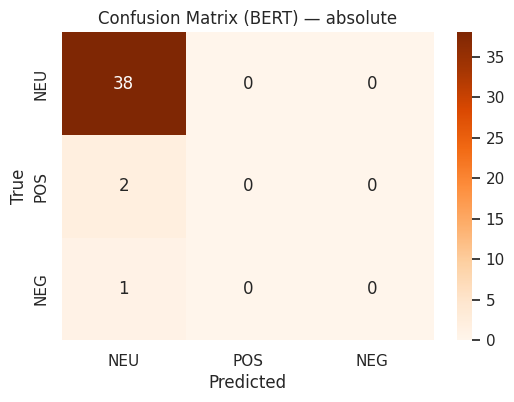

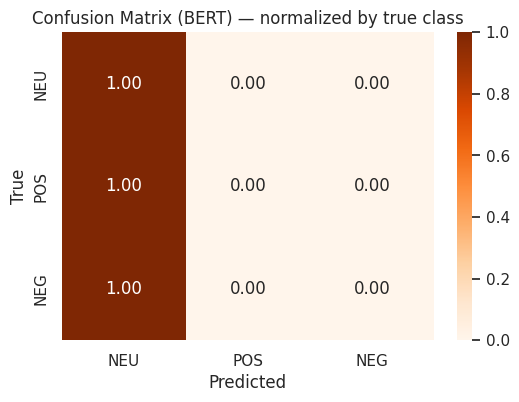


Total misclassified on test: 3 out of 41


,orig_idx,true_label,pred_label,pred_confidence,text_snippet
1,5,POS,NEU,0.993680,None
0,166,NEG,NEU,0.991110,"Bisnis.com, JAKARTA - Usai beramai-ramai mengeluhkan aplikasi MitraDarat error pada Senin (13/3/2023), kini warganet menyayangkan tiket mudik gratis Kementerian Perhubungan yang habis saat mendaftar di aplikasi. Dikutip dari laman Instagram @kemenhub151, pendaftaran mudik gratis dengan kendaraan..."
2,169,POS,NEU,0.935013,JAKARTA (BeritaTrans.com) – Kementerian Perhubungan melalui Direktorat Jenderal Perhubungan Darat terus berupaya dalam memberikan layanan transportasi darat yang lebih baik dengan melakukan peningkatan digitalisasi layanan. Baca Juga: Dirjen Hubdat: Keputusan Terkait Kenaikan Tarif dan Potongan ...


In [ ]:
# Jalankan training; jika resource terbatas, pertimbangkan menurunkan num_train_epochs
# Setelah training, lakukan predict pada test set dan tampilkan metrik + confusion matrix
# Tampilkan juga contoh misclassified (id, true, pred, confidence)

# Train
print("Starting training. This may take some minutes depending on GPU...")
train_result = trainer.train()
print("Training finished.")

# Evaluate on validation (already done during training), now do predict on test
print("Predicting on test set...")
pred_output = trainer.predict(ds_test)
logits = pred_output.predictions
test_labels = pred_output.label_ids
preds = np.argmax(logits, axis=-1)

# Get metrics using compute_metrics helper (we can call it directly)
bert_metrics = compute_metrics((logits, test_labels))
print("\nBERT Test Metrics (summary):")
print(f"Accuracy: {bert_metrics['accuracy']:.4f}")
print(f"F1 (macro): {bert_metrics['f1_macro']:.4f}")
print("Per-class F1 (order NEU, POS, NEG):")
for i, lab in id2label.items():
    print(f"  {lab}: Precision {bert_metrics['precision_by_class'][i]:.3f}, Recall {bert_metrics['recall_by_class'][i]:.3f}, F1 {bert_metrics['f1_by_class'][i]:.3f}, Support {bert_metrics['support_by_class'][i]}")

# Confusion matrix display
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, preds, labels=[0,1,2])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[id2label[i] for i in [0,1,2]], yticklabels=[id2label[i] for i in [0,1,2]], cmap='Oranges')
plt.title("Confusion Matrix (BERT) — absolute")
plt.ylabel("True"); plt.xlabel("Predicted")
plt.show()

# Normalized confusion matrix (by true class)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(6,4))
sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=[id2label[i] for i in [0,1,2]], yticklabels=[id2label[i] for i in [0,1,2]], cmap='Oranges')
plt.title("Confusion Matrix (BERT) — normalized by true class")
plt.ylabel("True"); plt.xlabel("Predicted")
plt.show()

# Error analysis: collect misclassified examples with confidence
import torch
probs = torch.softmax(torch.tensor(logits), dim=1).numpy()
errors = []

for i, (true, pred) in enumerate(zip(test_labels, preds)):
    if true != pred:
        errors.append({
            'orig_idx': int(test_orig_idxs[i]),
            'true_label': id2label[int(true)],
            'pred_label': id2label[int(pred)],
            'pred_confidence': float(probs[i][pred]),
            'text_snippet': merged.loc[int(test_orig_idxs[i]), 'text_bert'][:300]
        })


errors_df = pd.DataFrame(errors).sort_values('pred_confidence', ascending=False)
print("\nTotal misclassified on test:", len(errors_df), "out of", len(test_df))
if len(errors_df) > 0:
    display(errors_df.head(20))
else:
    print("No misclassifications on test set (rare).")

# Augmentation Strategy & Retrain BERT

**Augmentation Utilities (EDA-style) + Optional Back-translation**

In [ ]:
# Implementasi EDA sederhana sesuai Wei & Zou
# Methods: random_deletion, random_swap, random_insertion (token-level)
# Optional back_translation function (menggunakan googletrans)

import random
import re

# Simple tokenization util (preserve basic tokens)
def tokenize_simple(text):
    # Split on whitespace (text already normalized in text_bert)
    if not isinstance(text, str) or text.strip()=="":
        return []
    return text.split()

def detokenize(tokens):
    return " ".join(tokens)

# EDA methods
def random_deletion(words, p=0.1):
    """
    Menghapus tiap kata dengan probabilitas p.
    Jika semua kata terhapus, return original minimal satu kata.
    """
    if len(words) == 0:
        return words
    # Jika hanya 1 kata, jangan dihapus
    if len(words) == 1:
        return words
    new_words = []
    for w in words:
        if random.random() > p:
            new_words.append(w)
    if len(new_words) == 0:
        # Ambil satu kata random untuk mencegah empty
        return [random.choice(words)]
    return new_words

def random_swap(words, n_swaps=1):
    """
    Lakukan n_swaps pertukaran acak antara dua indeks.
    """
    new_words = words.copy()
    length = len(new_words)
    if length < 2:
        return new_words
    for _ in range(n_swaps):
        i = random.randint(0, length-1)
        j = random.randint(0, length-1)
        # swap
        new_words[i], new_words[j] = new_words[j], new_words[i]
    return new_words

def random_insertion(words, n_insert=1):
    """
    Insert duplicate token at random position (simple insertion).
    Lebih aman daripada synonym insertion bila synonym tidak tersedia.
    """
    new_words = words.copy()
    length = len(new_words)
    if length == 0:
        return new_words
    for _ in range(n_insert):
        idx = random.randint(0, length-1)
        word_to_dup = new_words[random.randint(0, length-1)]
        insert_pos = random.randint(0, length)
        new_words.insert(insert_pos, word_to_dup)
        length += 1
    return new_words

# Optional: Back-translation (requires googletrans & internet)
def try_import_googletrans():
    try:
        from googletrans import Translator
        return Translator()
    except Exception as e:
        return None

translator = None
# Attempt to import; if not available, user can pip install googletrans
try:
    from googletrans import Translator
    translator = Translator()
except Exception:
    translator = None
    # Not installed; if user wants, they can: !pip install googletrans==4.0.0-rc1
    # But may be rate-limited by Google; use with caution.

def back_translate(text, src='id', mid='en'):
    """
    Back-translation via googletrans (id -> en -> id). Optional, may fail if translator not available.
    Return original text on failure.
    """
    if translator is None:
        return text
    try:
        inter = translator.translate(text, src=src, dest=mid).text
        back = translator.translate(inter, src=mid, dest=src).text
        return back
    except Exception:
        return text

# Augmentation wrapper to produce one augmented sample
def augment_text(text, method='deletion', **kwargs):
    """
    Method: 'deletion', 'swap', 'insertion', 'backtranslate'
    Kwargs: parameters for method (p for deletion, n_swaps, n_insert)
    """
    words = tokenize_simple(text)
    if method == 'deletion':
        p = kwargs.get('p', 0.1)
        aug = random_deletion(words, p=p)
        return detokenize(aug)
    elif method == 'swap':
        n_swaps = kwargs.get('n_swaps', max(1, len(words)//10))
        aug = random_swap(words, n_swaps=n_swaps)
        return detokenize(aug)
    elif method == 'insertion':
        n_insert = kwargs.get('n_insert', max(1, len(words)//15))
        aug = random_insertion(words, n_insert=n_insert)
        return detokenize(aug)
    elif method == 'backtranslate':
        return back_translate(text)
    else:
        return text  # No-op

**Decide Augmentation Targets & Generate Augmented Samples**

In [ ]:
# Ambil distribusi di train_df
# Target: samakan ke jumlah kelas mayoritas, atau ke minimal n_samples per class (user can adjust)
# Gunakan kombinasi metode untuk variasi: deletion/swap/insertion (+ optional back-translation)
# Hanya augment train_df

from collections import Counter
import math
random.seed(SEED)

# Pastikan train_df ada
try:
    train_df
except NameError:
    raise Exception("train_df tidak ditemukan. Jalankan Cell 9 untuk membuat train/val/test split.")

# Hitung distribusi train
train_counts = train_df['label_id'].value_counts().to_dict()
print("Train counts (before augmentation):", {id2label[k]:v for k,v in train_counts.items()})

# Tentukan target_count: misal samakan ke class max atau minimal 50, pilih yang lebih kecil
max_count = max(train_counts.values())
target_count = max_count  # kamu bisa mengganti, mis. int(max_count*1.0) atau 50
print(f"Target samples per class after augmentation: {target_count}")

# Augment only for classes with count < target_count
augmented_rows = []  # Will collect dicts {text,label_id,orig_idx,aug_method}
methods_cycle = ['deletion','swap','insertion']  # Rotate methods for variation
use_backtranslation = False  # Set True to attempt backtranslation if translator available

for label_id, cnt in train_counts.items():
    if cnt >= target_count:
        continue
    needed = target_count - cnt
    print(f"Augmenting class {id2label[label_id]}: need {needed} samples")
    # Get indices of examples for this class
    examples = train_df[train_df['label_id'] == label_id].reset_index(drop=True)
    if examples.empty:
        print(f"  Warning: no examples for class {id2label[label_id]} in train set. Skipping.")
        continue
    # Generate augmented samples by iterating over existing examples
    i = 0
    tries = 0
    while len([r for r in augmented_rows if r['label_id']==label_id]) < needed and tries < needed * 10:
        # Pick a random original example
        row = examples.sample(n=1, random_state=random.randint(0,10000)).iloc[0]
        orig_text = row['text_bert'] if 'text_bert' in row.index else row['text']
        # Choose method cyclically
        method = methods_cycle[i % len(methods_cycle)]
        aug_text = augment_text(orig_text, method=method)
        # Occasionally try backtranslation if enabled and translator present
        if use_backtranslation and random.random() < 0.15 and translator is not None:
            aug_text = augment_text(aug_text, method='backtranslate')
        # Sanity: skip overly short augmentation
        if len(aug_text.split()) < max(3, int(len(orig_text.split())*0.3)):
            tries += 1
            i += 1
            continue
        augmented_rows.append({
            'text': aug_text,
            'label_id': label_id,
            'orig_idx': int(row['orig_idx']),
            'aug_method': method
        })
        i += 1
        tries += 1

print("Total augmented samples created:", len(augmented_rows))
# Summarize per class
from collections import defaultdict
summary = defaultdict(int)
for r in augmented_rows:
    summary[id2label[r['label_id']]] += 1
print("Augmented per class:", dict(summary))

Train counts (before augmentation): {'NEU': 133, 'POS': 8, 'NEG': 3}
Target samples per class after augmentation: 133
Augmenting class POS: need 125 samples
Augmenting class NEG: need 130 samples
Total augmented samples created: 255
Augmented per class: {'POS': 125, 'NEG': 130}


**Build Augmented train_df & Re-tokenize for Trainer**

In [ ]:
# Gabungkan original train_df dengan augmented_rows menjadi train_aug_df
# Kemudian tokenisasi ulang menggunakan tokenizer & MAX_LEN yang sebelumnya dipilih
# Siapkan ds_train_aug (datasets.Dataset) berformat PyTorch untuk Trainer

# Build augmented DataFrame
aug_df = pd.DataFrame(augmented_rows)
# If no augmented samples (could happen if already balanced or augmentation failed), skip
if aug_df.empty:
    print("No augmented samples produced — skipping augmentation retrain step.")
else:
    # Create DataFrame with same columns as train_df: orig_idx, text_bert/text, label_id
    # Our augmented rows use key 'text'
    train_aug_list = []
    # Original train rows: keep orig_idx and text_bert
    for _, r in train_df.iterrows():
        train_aug_list.append({'orig_idx': int(r['orig_idx']), 'text': r['text_bert'] if 'text_bert' in r.index else r['text'], 'label': int(r['label_id']), 'aug': False})
    # Augmented rows
    for r in augmented_rows:
        train_aug_list.append({'orig_idx': int(r['orig_idx']), 'text': r['text'], 'label': int(r['label_id']), 'aug': True, 'aug_method': r.get('aug_method','')})
    train_aug_df = pd.DataFrame(train_aug_list)
    print("Train augmented size:", len(train_aug_df), " (original train size:", len(train_df), ")")
    # Show new distribution
    print("New label distribution in augmented train:")
    display(train_aug_df['label'].map(id2label).value_counts())

    # Convert to datasets.Dataset and tokenize
    from datasets import Dataset
    ds_train_aug = Dataset.from_pandas(train_aug_df[['orig_idx','text','label']].rename(columns={'text':'text','label':'label'}))
    def tokenize_fn(batch):
        return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=MAX_LEN)
    print("Tokenizing augmented train set...")
    ds_train_aug = ds_train_aug.map(tokenize_fn, batched=True, remove_columns=['text'])
    ds_train_aug.set_format(type='torch', columns=['input_ids','attention_mask','label'])
    print("Tokenization of augmented train done. Example entry:")
    print(ds_train_aug[0])

Train augmented size: 399  (original train size: 144 )
New label distribution in augmented train:


,count
label,
NEU,133
POS,133
NEG,133


Tokenizing augmented train set...


Map:   0%|          | 0/399 [00:00<?, ? examples/s]

Tokenization of augmented train done. Example entry:
{'label': tensor(0), 'input_ids': tensor([    2,   678, 30468,  6218,   553, 30470,  2231, 30469,  3688, 12127,
        30464,  5037, 14742, 30465,  9631,  1339,  3435,  6534, 30470,  1339,
           92,   781,    90,  7373,  6514,  7582,  9562,  1243, 30470,  4726,
         7407,   795,  5037, 14742, 30468, 21005,  2355,   313,  1539,    98,
         1339,    92,  2576,   173,  2050,    90,   845,  9562,  1243,   158,
          845,   245,    34,  4208, 30470,  3435,  6534,   186,  3508,   781,
          242,  1099,  1006,    34,  3076,  1092,   991,  1195,  3035,   608,
         5700,     5,   552, 30470,   345,  1339,    92,  2576,   234,  1099,
         1006, 30470,   211,   776,    92,   219,   119,  1121,  1006,  1195,
         2609,   991, 23614, 30468,  2045,  3612, 21005,   112,  8836,   460,
           57, 30468,  3248, 30464,  1328, 30471,   283, 30465, 30470,  2064,
          186, 30472, 16473,  5320, 30468,  5037, 14742

**Retrain BERT on Augmented Train Set (Fresh Model) & Evaluate on Test**

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-706581634.py:11: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_aug = Trainer(


Starting training on augmented data...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision By Class,Recall By Class,F1 By Class,Support By Class
1,No log,0.674488,0.894737,0.472222,0.472222,0.472222,"[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[18, 1, 0]"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision By Class,Recall By Class,F1 By Class,Support By Class
1,No log,0.674488,0.894737,0.472222,0.472222,0.472222,"[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[18, 1, 0]"
2,No log,0.569173,0.894737,0.472222,0.472222,0.472222,"[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[18, 1, 0]"
3,No log,0.544568,0.894737,0.472222,0.472222,0.472222,"[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[0.9444444444444444, 0.0, 0.0]","[18, 1, 0]"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training on augmented data finished.
Predicting on test set with augmented model...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Augmented BERT Test Metrics (summary):
Accuracy: 0.9512
F1 (macro): 0.5470
Per-class F1 (order NEU, POS, NEG):
  NEU: Precision 0.950, Recall 1.000, F1 0.974, Support 38
  POS: Precision 1.000, Recall 0.500, F1 0.667, Support 2
  NEG: Precision 0.000, Recall 0.000, F1 0.000, Support 1


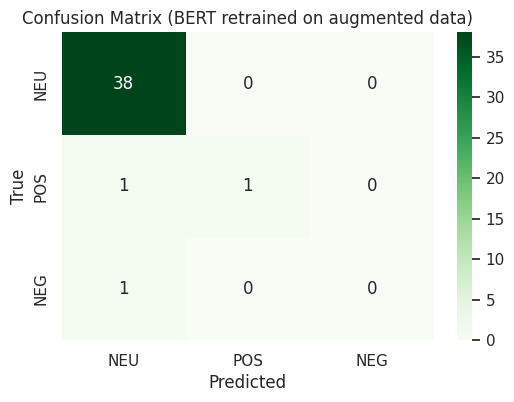


Comparison (Original BERT vs Augmented BERT):


,model,accuracy,f1_macro,f1_per_class
0,BERT_orig,0.926829,0.320675,"[0.9620253164556962, 0.0, 0.0]"
1,BERT_aug,0.951220,0.547009,"[0.9743589743589743, 0.6666666666666666, 0.0]"


In [ ]:
# Load fresh model from MODEL_NAME (start from pretrained), train on ds_train_aug, eval on ds_val and ds_test
# Use training_args but set save_strategy='no' as before
# Setelah training, tampilkan metrics dan confusion matrix pada test set

if 'ds_train_aug' not in globals():
    print("No augmented dataset found (ds_train_aug not defined). Nothing to retrain.")
else:
    # Initialize fresh model
    model_aug = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label2id))
    # Create a new Trainer with same training_args but new model
    trainer_aug = Trainer(
        model=model_aug,
        args=training_args,
        train_dataset=ds_train_aug,
        eval_dataset=ds_val,   # validation unchanged
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train
    print("Starting training on augmented data...")
    train_result_aug = trainer_aug.train()
    print("Training on augmented data finished.")

    # Predict on test
    print("Predicting on test set with augmented model...")
    pred_output_aug = trainer_aug.predict(ds_test)
    logits_aug = pred_output_aug.predictions
    test_labels = pred_output_aug.label_ids
    preds_aug = np.argmax(logits_aug, axis=1)
    # Metrics
    metrics_aug = compute_metrics((logits_aug, test_labels))
    print("\nAugmented BERT Test Metrics (summary):")
    print(f"Accuracy: {metrics_aug['accuracy']:.4f}")
    print(f"F1 (macro): {metrics_aug['f1_macro']:.4f}")
    print("Per-class F1 (order NEU, POS, NEG):")
    for i, lab in id2label.items():
        print(f"  {lab}: Precision {metrics_aug['precision_by_class'][i]:.3f}, Recall {metrics_aug['recall_by_class'][i]:.3f}, F1 {metrics_aug['f1_by_class'][i]:.3f}, Support {metrics_aug['support_by_class'][i]}")

    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm_aug = confusion_matrix(test_labels, preds_aug, labels=[0,1,2])
    import matplotlib.pyplot as plt, seaborn as sns
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_aug, annot=True, fmt='d', xticklabels=[id2label[i] for i in [0,1,2]], yticklabels=[id2label[i] for i in [0,1,2]], cmap='Greens')
    plt.title("Confusion Matrix (BERT retrained on augmented data)")
    plt.ylabel("True"); plt.xlabel("Predicted")
    plt.show()

    # Compare original bert_metrics (if exists) and metrics_aug
    try:
        print("\nComparison (Original BERT vs Augmented BERT):")
        row_orig = {'model':'BERT_orig','accuracy':bert_metrics['accuracy'],'f1_macro':bert_metrics['f1_macro'],'f1_per_class':bert_metrics['f1_by_class']}
    except NameError:
        row_orig = None
    row_aug = {'model':'BERT_aug','accuracy':metrics_aug['accuracy'],'f1_macro':metrics_aug['f1_macro'],'f1_per_class':metrics_aug['f1_by_class']}
    comp_rows = [r for r in [row_orig, row_aug] if r is not None]
    comp_df = pd.DataFrame(comp_rows)
    display(comp_df)

# Experiment Summary & Comparison Tables

In [ ]:
# Mengumpulkan hasil dari semua model yang sudah dijalankan
# Menyajikan tabel ringkas (accuracy, F1-macro, F1 per kelas)

import pandas as pd
import numpy as np

summary_rows = []

# 1. TF-IDF + SVM RESULTS
# Pastikan variabel
# y_test, y_pred, y_pred_bal, y_pred_ros
def collect_svm_result(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    acc = accuracy_score(y_true, y_pred)
    p, r, f, s = precision_recall_fscore_support(
        y_true, y_pred, labels=[0,1,2], zero_division=0
    )
    return {
        'Model': model_name,
        'Accuracy': acc,
        'F1_macro': np.mean(f),
        'F1_NEU': f[0],
        'F1_POS': f[1],
        'F1_NEG': f[2],
        'Support_NEU': s[0],
        'Support_POS': s[1],
        'Support_NEG': s[2]
    }

# Baseline SVM
summary_rows.append(
    collect_svm_result("TF-IDF + SVM (Baseline)", y_test, y_pred)
)

# SVM balanced
summary_rows.append(
    collect_svm_result("TF-IDF + SVM (class_weight=balanced)", y_test, y_pred_bal)
)

# SVM + Oversampling
summary_rows.append(
    collect_svm_result("TF-IDF + SVM (RandomOverSampler)", y_test, y_pred_ros)
)

# 2. BERT ORIGINAL RESULT
# Menggunakan bert_metrics
summary_rows.append({
    'Model': 'BERT (Original)',
    'Accuracy': bert_metrics['accuracy'],
    'F1_macro': bert_metrics['f1_macro'],
    'F1_NEU': bert_metrics['f1_by_class'][0],
    'F1_POS': bert_metrics['f1_by_class'][1],
    'F1_NEG': bert_metrics['f1_by_class'][2],
    'Support_NEU': bert_metrics['support_by_class'][0],
    'Support_POS': bert_metrics['support_by_class'][1],
    'Support_NEG': bert_metrics['support_by_class'][2]
})

# 3. BERT + AUGMENTATION
# Jika eksperimen augmentasi dijalankan
if 'metrics_aug' in globals():
    summary_rows.append({
        'Model': 'BERT (Augmented Train)',
        'Accuracy': metrics_aug['accuracy'],
        'F1_macro': metrics_aug['f1_macro'],
        'F1_NEU': metrics_aug['f1_by_class'][0],
        'F1_POS': metrics_aug['f1_by_class'][1],
        'F1_NEG': metrics_aug['f1_by_class'][2],
        'Support_NEU': metrics_aug['support_by_class'][0],
        'Support_POS': metrics_aug['support_by_class'][1],
        'Support_NEG': metrics_aug['support_by_class'][2]
    })

# Build final summary table
summary_df = pd.DataFrame(summary_rows)

# Round numeric columns for readability
numeric_cols = summary_df.select_dtypes(include=[np.number]).columns
summary_df[numeric_cols] = summary_df[numeric_cols].round(4)

print("=== FINAL EXPERIMENT SUMMARY TABLE ===")
display(summary_df)

# Highlight best model by F1_macro
best_row = summary_df.loc[summary_df['F1_macro'].idxmax()]
print("Best model based on F1_macro:")
display(best_row.to_frame(name="Value"))

=== FINAL EXPERIMENT SUMMARY TABLE ===


,Model,Accuracy,F1_macro,F1_NEU,F1_POS,F1_NEG,Support_NEU,Support_POS,Support_NEG
0,TF-IDF + SVM (Baseline),0.9512,0.5470,0.9744,0.6667,0.0,38,2,1
1,TF-IDF + SVM (class_weight=balanced),0.9512,0.5470,0.9744,0.6667,0.0,38,2,1
2,TF-IDF + SVM (RandomOverSampler),0.4634,0.4327,0.6316,0.6667,0.0,38,2,1
3,BERT (Original),0.9268,0.3207,0.9620,0.0000,0.0,38,2,1
4,BERT (Augmented Train),0.9512,0.5470,0.9744,0.6667,0.0,38,2,1


Best model based on F1_macro:


,Value
Model,TF-IDF + SVM (Baseline)
Accuracy,0.9512
F1_macro,0.547
F1_NEU,0.9744
F1_POS,0.6667
F1_NEG,0.0
Support_NEU,38
Support_POS,2
Support_NEG,1
